In [2]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:

#This is a proof of concept for ATL and Chiroptera correspondence matching.
#gt3r will be 11m x seg_distm windows with segment height representations
import pandas as pd
import numpy as np
import pandas as pd
import rasterio 

atl_df = pd.read_csv('unshifted_gt3r_full.csv')

length = atl_df['seg_dist']

dx = atl_df['x'].diff()
dy = atl_df['y'].diff()

angle_radians = np.arctan2(dy, dx)

width = 11 # footprint
x0, y0 = atl_df['x'], atl_df['y']
x1 = x0 - (length / 2) * np.cos(angle_radians) + (width / 2) * np.sin(angle_radians)
y1 = y0 - (length / 2) * np.sin(angle_radians) - (width / 2) * np.cos(angle_radians)
x2 = x0 + (length / 2) * np.cos(angle_radians) + (width / 2) * np.sin(angle_radians)
y2 = y0 + (length / 2) * np.sin(angle_radians) - (width / 2) * np.cos(angle_radians)
x3 = x0 + (length / 2) * np.cos(angle_radians) - (width / 2) * np.sin(angle_radians)
y3 = y0 + (length / 2) * np.sin(angle_radians) + (width / 2) * np.cos(angle_radians)
x4 = x0 - (length / 2) * np.cos(angle_radians) - (width / 2) * np.sin(angle_radians)
y4 = y0 - (length / 2) * np.sin(angle_radians) + (width / 2) * np.cos(angle_radians)

atl_df['x1'] = x1
atl_df['y1'] = y1
atl_df['x2'] = x2
atl_df['y2'] = y2
atl_df['x3'] = x3
atl_df['y3'] = y3
atl_df['x4'] = x4
atl_df['y4'] = y4
atl_df

,x,y,slope,heights,dt,seg_dist_x,seg_dist,prev_seg_dist,next_seg_dist,conf,...,lpe,ib,x1,y1,x2,y2,x3,y3,x4,y4
0,1.389962e+06,1.248725e+07,NaN,3.402823e+38,1.440881e+08,7.401663e+06,NaN,NaN,NaN,3.402823e+38,...,3.402823e+38,0.070184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.389830e+06,1.248664e+07,4.642218,3.402823e+38,1.440881e+08,7.402279e+06,616.571113,NaN,308.285557,3.402823e+38,...,3.402823e+38,0.070263,1.389890e+06,1.248695e+07,1.389760e+06,1.248634e+07,1.389771e+06,1.248634e+07,1.389901e+06,1.248694e+07
2,1.389805e+06,1.248653e+07,4.638447,3.402823e+38,1.440881e+08,7.402400e+06,121.046848,308.285557,60.523424,3.402823e+38,...,3.402823e+38,0.070278,1.389812e+06,1.248659e+07,1.389787e+06,1.248647e+07,1.389797e+06,1.248646e+07,1.389823e+06,1.248658e+07
3,1.389800e+06,1.248650e+07,4.632857,3.402823e+38,1.440881e+08,7.402421e+06,21.077066,60.523424,10.538533,3.402823e+38,...,3.402823e+38,0.070281,1.389797e+06,1.248652e+07,1.389793e+06,1.248650e+07,1.389803e+06,1.248649e+07,1.389808e+06,1.248651e+07
4,1.389800e+06,1.248650e+07,4.631779,3.402823e+38,1.440881e+08,7.402424e+06,2.845787,10.538533,1.422894,3.402823e+38,...,3.402823e+38,0.070281,1.389795e+06,1.248650e+07,1.389794e+06,1.248650e+07,1.389805e+06,1.248650e+07,1.389805e+06,1.248650e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88035,1.490373e+04,7.862173e+06,2.843844,3.402823e+38,1.440888e+08,1.221924e+07,802.647587,57.882595,401.323793,3.402823e+38,...,4.806372e-02,0.009478,1.503167e+04,7.862554e+06,1.476541e+04,7.861797e+06,1.477579e+04,7.861793e+06,1.504205e+04,7.862550e+06
88036,1.462746e+04,7.861388e+06,2.844270,3.402823e+38,1.440888e+08,1.222007e+07,830.934990,401.323793,415.467495,3.402823e+38,...,4.806372e-02,0.009429,1.476007e+04,7.861781e+06,1.448447e+04,7.860997e+06,1.449484e+04,7.860994e+06,1.477045e+04,7.861778e+06
88037,1.455137e+04,7.861171e+06,2.840777,3.402823e+38,1.440888e+08,1.222030e+07,228.603574,415.467495,114.301787,3.402823e+38,...,4.806372e-02,0.009415,1.458413e+04,7.861281e+06,1.450823e+04,7.861065e+06,1.451860e+04,7.861062e+06,1.459451e+04,7.861277e+06
88038,1.433769e+04,7.860565e+06,2.839517,3.402823e+38,1.440888e+08,1.222095e+07,641.712743,114.301787,320.856371,3.402823e+38,...,4.806372e-02,0.009377,1.443908e+04,7.860869e+06,1.422592e+04,7.860264e+06,1.423630e+04,7.860260e+06,1.444946e+04,7.860866e+06


In [4]:
import os
import pandas as pd
import rasterio
import numpy as np

#First: test loading rasters on one row.

def check(p1, p2, base_array):
    """
    Uses the line defined by p1 and p2 to check array of 
    input indices against interpolated value

    Returns boolean array, with True inside and False outside of shape
    """
    idxs = np.indices(base_array.shape) # Create 3D array of indices

    p1 = p1.astype(float)
    p2 = p2.astype(float)

    # Calculate max column idx for each row idx based on interpolated line between two points
    max_col_idx = (idxs[0] - p1[0]) / (p2[0] - p1[0]) * (p2[1] - p1[1]) +  p1[1]    
    sign = np.sign(p2[0] - p1[0])
    return idxs[1] * sign <= max_col_idx * sign

#create polygon and reference x y for each one value 

def create_polygon(shape, vertices):
    """
    Creates np.array with dimensions defined by shape
    Fills polygon defined by vertices with ones, all other values zero"""
    base_array = np.zeros(shape, dtype=np.int8)  # Initialize your array of zeros
    fill = np.ones(base_array.shape) * True  # Initialize boolean array defining shape fill
    # Create check array for each edge segment, combine into fill array
    for k in range(vertices.shape[0]):
        fill = np.all([fill, check(vertices[k-1], vertices[k], base_array)], axis=0)
    # Set all values inside polygon to one
    base_array[fill] = 1
    return base_array

#Inputs: an image and a coordinate
#Returns: a boolean for whether the coordinate is in the geotiff
def in_bbox(image, coord):
    bounds = image.bounds
    if  (coord[0] > bounds.left 
        and coord[0] < bounds.right 
        and coord[1] > bounds.bottom 
        and coord[1] < bounds.top):
        return True
    else:
        return False

#This should be constructing an array for the row representing the correct values
#1 cell represents 1 meter 
def create_polygons_from_rows(rows):
    xcoords, ycoords,vatcoords = [],[],[]
    #1 value per row
    for i, row in enumerate(rows):
        value = int(row.stype)
        x1, y1, x2, y2, x3, y3, x4, y4 = row.x1, row.y1, row.x2, row.y2, row.x3, row.y3, row.x4, row.y4
        x_min = int(min(x1, x2, x3, x4))
        y_min = int(min(y1, y2, y3, y4))
        x1,x2,x3,x4 = x =  (np.array([x1,x2,x3,x4]) - x_min).astype(int)
        y1,y2,y3,y4 = y = (np.array([y1,y2,y3,y4]) - y_min).astype(int)
        #print(f'{x1},{y1}\n{x2},{y2}\n{x3},{y3}\n{x4},{y4}')
        arr = create_polygon([max(x) + 2,max(y) + 2], np.array([[x1, y1], [x4, y4], [x3, y3], [x2, y2]]))
        # print(f'{x} {y}: {min_x} {min_y} {max_x} {max_y}')
        #The above creates a polygon with (0,0) starting point
        #this changes the polygon to (x_min, y_min) starting point
        xs = list((np.where(arr == 1)[0] + x_min))
        ys = list((np.where(arr == 1)[1] + y_min))
        values = [value] * len(xs)
        xcoords.extend(xs)
        ycoords.extend(ys)
        vatcoords.extend(values)
    return [xcoords, ycoords, vatcoords]
#we want this array in sparse format.

#now do this for all rows..
[xcoords, ycoords, vatcoords] = create_polygons_from_rows([atl_df.iloc[47101], atl_df.iloc[47102]])
# np.savetxt('arr.txt', np.array(l))

In [ ]:
#SUBSAMPLE CHIROP DATAFRAME AND SAVE AS PICKLE (change the folder paths below)
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

df = pd.read_pickle('..')
# subsample data
df = df.iloc[::100, :]
df.to_pickle('..')

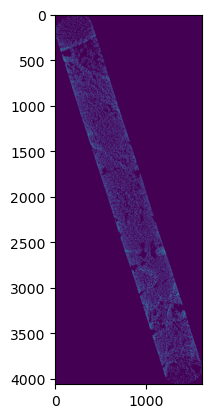

In [43]:
#CREATE IMAGE FROM CHIROPTERA DATAFRAME
#Assuming there is a folder at "data/100 1B" with 100th subsamples
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import skimage as skimage
import pandas as pd
import numpy as np
import cv2

for b1 in range(0, 32, 4):
    b2 = b1 + 4
    df= pd.read_pickle(f'../data/100 1B/{b1}m-{b2}m.pkl')
    df['ice'] = 0
    #TODO: change to graduated levels
    max_z = np.max(df['z']) #np.percentile(df['z'], 99)
    min_z = np.min(df['z'])
    df['h'] = (((df['z'] - min_z) * 255 / (max_z - min_z))).astype(np.int16)
    df['0x'] = (df['x'] - min(df['x'])).astype(np.int16)
    df['0y'] = (df['y'] - min(df['y'])).astype(np.int16)
    width = df['0x'].max() + 1
    height = df['0y'].max() + 1
    # Create an empty 2D array for the image
    image = np.zeros((height, width)).astype(np.int16)
    # Fill the image array with grayscale values from the DataFrame
    #TODO: make the outputs more contrastive
    for index, row in df.iterrows():
        x = int(row['0x'])
        y = int(row['0y'])
        try:
            image[y:y+5, x:x+5] = row['h']
        except:
            image[y, x] = row['h']
    # kernel = np.ones((3,3),np.float32) * INTENSITY
    # image = cv2.filter2D(image, -1, kernel)
    plt.imshow(image)
    im3 = Image.fromarray(image)
    im3 = im3.convert("L")
    im3.save(f"chirop_jpg/dense_chirop_{b1}_{b2}.jpg")

In [45]:
#ROTATE AND CROP IMAGE AS NUMPY ARRAY

#For transforming the Chiroptera data, the rightmost point is not correct but it is consistently wrong, so we add an additional shift here.

R_SHIFT = 168
ROT = 17.9
import cv2

#f'atl_jpg_base/atl_{i}_{i+4}.jpg'

#ATL requires ROT
#Chirop requires -ROT

for i in range(0, 32, 4):
    path = f'chirop_jpg/dense_chirop_{i}_{i+4}.jpg'
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

    rot_image = ndimage.rotate(image, -ROT, reshape=False)
    # im3 = Image.fromarray(rot_image)
    # im3 = im3.convert("L")
    # im3.save(f'atl_jpg/atl_{i}_{i+4}_rot.jpg')
    leftmost = np.inf
    rightmost = 0
    for row in rot_image:
        #we want the index of the last nonzero value
        if np.count_nonzero(row) > 0:
            local_left = np.min(np.nonzero(row))
            local_right = np.max(np.nonzero(row))
            if local_left < leftmost:
                #print(f"setting leftmost to {local_left}")
                leftmost = local_left
            if local_right > rightmost:
                rightmost = local_right
    print(f'{leftmost} {rightmost}')
    cropped_img = rot_image[:,leftmost:rightmost]
    im3 = Image.fromarray(cropped_img)
    im3 = im3.convert("L")
    im3.save(f'chirop_jpg/chirop_{i}_{i+4}.jpg')

666 1154
612 1087
632 1074
597 1041
621 1064
609 1050
637 1079
584 1026


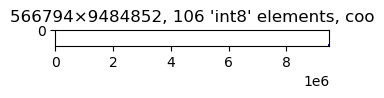

In [40]:
#sparse matrix approach won't work.
!pip install matspy
import numpy as np
from scipy.sparse import coo_matrix
from matspy import spy
i = xcoords
j = ycoords
v = np.array(vatcoords).astype(np.int8)
sparse_atl = coo_matrix((v, (i, j)), shape=(max(xcoords)+1, max(ycoords)+1))
spy(sparse_atl)
